In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [4]:
#!unzip ml-100k.zip

# Dataset Preparation

In [8]:
columns_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("ml-100k/u.data",sep = '\t', names = columns_names)

In [9]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [10]:
df.shape

(100000, 4)

In [11]:
df["user_id"].nunique()

943

In [12]:
df["item_id"].nunique()

1682

In [15]:
movies_titles = pd.read_csv("ml-100k/u.item",sep = '\|', header = None)

In [16]:
movies_titles.shape

(1682, 24)

In [17]:
movies_titles = movies_titles[[0,1]]

In [18]:
movies_titles.shape

(1682, 2)

In [20]:
movies_titles.columns = ['item_id','title']

In [21]:
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [22]:
df = pd.merge(df, movies_titles, on="item_id")

In [23]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [24]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


# EDA

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [26]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [31]:
df.groupby('title').count()['rating'].sort_values(ascending=False).head(n=10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [32]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [34]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [35]:
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [36]:
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


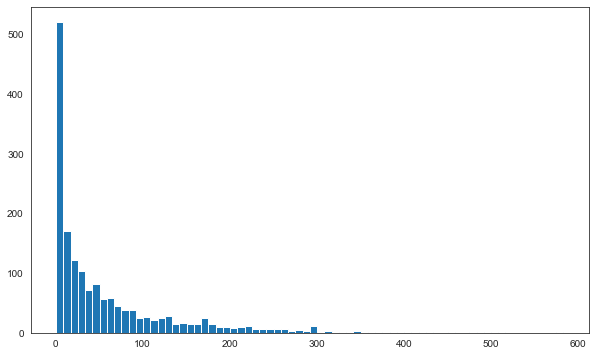

In [41]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num_of_ratings'],bins=70)
plt.show()

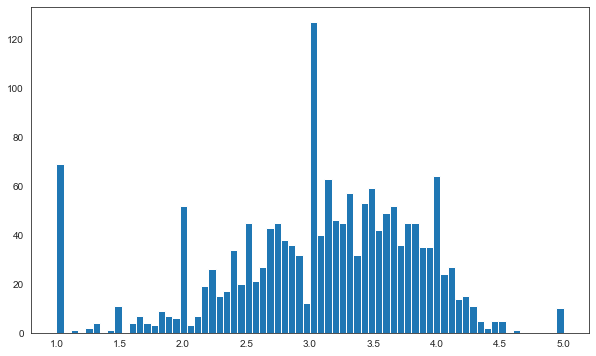

In [42]:
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'],bins=70)
plt.show()

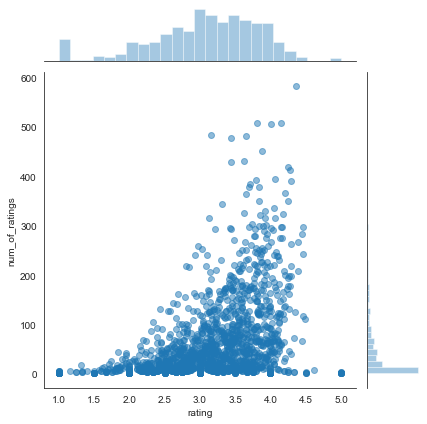

In [44]:
sns.jointplot(x='rating' , y='num_of_ratings' , data=ratings, alpha=0.5)
plt.show()

# Creating Movie Recommendation

In [45]:
movie_matrix = df.pivot_table(index="user_id", columns="title", values="rating")

In [47]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [50]:
def predict_movies(movie_name):
    movie_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    corr_movie_name = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_movie_name.dropna(inplace = True)
    corr_movie_name = corr_movie_name.join(ratings['num_of_ratings'])
    predictions = corr_movie_name[corr_movie_name['num_of_ratings']>100].sort_values('Correlation', ascending=False)
    return predictions

In [51]:
predictions = predict_movies("Titanic (1997)")

In [52]:
predictions.head()

,Correlation,num_of_ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
